In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import cos, sin, exp, Matrix, sqrt
from sympy.simplify.fu import TR10, TR9
import pandas as pd

from IPython.display import display, Math
from IPython.display import display as disp
from utils import symdisp, symplot
import ipywidgets as widgets
from ipywidgets import interact

from commpy.utilities import upsample

from optic.modulation import modulateGray, demodulateGray, GrayMapping
from optic.dsp import firFilter, pulseShape, lowPassFIR, pnorm, sincInterp
from optic.metrics import signal_power
from optic.plot import eyediagram

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.options.display.float_format = '{:,d}'.format

In [3]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
figsize(10, 4)

# Transmissão Digital da Informação

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Representações-para-a-onda-portadora" data-toc-modified-id="Representações-para-a-onda-portadora-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Representações para a onda portadora</a></span></li><li><span><a href="#Modulações-digitais" data-toc-modified-id="Modulações-digitais-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modulações digitais</a></span><ul class="toc-item"><li><span><a href="#Diagramas-de-constelação" data-toc-modified-id="Diagramas-de-constelação-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Diagramas de constelação</a></span></li><li><span><a href="#Parâmetros-importantes-das-modulações-digitais" data-toc-modified-id="Parâmetros-importantes-das-modulações-digitais-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Parâmetros importantes das modulações digitais</a></span><ul class="toc-item"><li><span><a href="#Energia-média-dos-símbolos-da-constelação-($E_s$)" data-toc-modified-id="Energia-média-dos-símbolos-da-constelação-($E_s$)-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Energia média dos símbolos da constelação ($E_s$)</a></span></li><li><span><a href="#Distância-euclidiana-mínima-entre-símbolos-($d_{min}$)" data-toc-modified-id="Distância-euclidiana-mínima-entre-símbolos-($d_{min}$)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Distância euclidiana mínima entre símbolos ($d_{min}$)</a></span></li></ul></li></ul></li><li><span><a href="#Intervalo-de-sinalização" data-toc-modified-id="Intervalo-de-sinalização-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Intervalo de sinalização</a></span></li><li><span><a href="#Teorema-da-amostragem" data-toc-modified-id="Teorema-da-amostragem-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Teorema da amostragem</a></span><ul class="toc-item"><li><span><a href="#Exemplo-1:-função-sinc(t)" data-toc-modified-id="Exemplo-1:-função-sinc(t)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Exemplo 1: função sinc(t)</a></span></li><li><span><a href="#Exemplo-2:-chirp-de-frequência-linear" data-toc-modified-id="Exemplo-2:-chirp-de-frequência-linear-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exemplo 2: chirp de frequência linear</a></span></li></ul></li><li><span><a href="#Gerando-sinais-binários" data-toc-modified-id="Gerando-sinais-binários-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Gerando sinais binários</a></span><ul class="toc-item"><li><span><a href="#Pulso-retangular-ideal" data-toc-modified-id="Pulso-retangular-ideal-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Pulso retangular ideal</a></span></li><li><span><a href="#Pulso-NRZ-típico" data-toc-modified-id="Pulso-NRZ-típico-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Pulso NRZ típico</a></span></li><li><span><a href="#Pulso-cosseno-levantado" data-toc-modified-id="Pulso-cosseno-levantado-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Pulso cosseno levantado</a></span></li></ul></li><li><span><a href="#Densidade-espectral-de-potência-de-sinais-modulados-digitalmenente" data-toc-modified-id="Densidade-espectral-de-potência-de-sinais-modulados-digitalmenente-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Densidade espectral de potência de sinais modulados digitalmenente</a></span><ul class="toc-item"><li><span><a href="#Valor-médio-e-autocorrelação-de-$V(t)$" data-toc-modified-id="Valor-médio-e-autocorrelação-de-$V(t)$-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Valor médio e autocorrelação de $V(t)$</a></span><ul class="toc-item"><li><span><a href="#Valor-médio" data-toc-modified-id="Valor-médio-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Valor médio</a></span></li><li><span><a href="#Autocorrelação" data-toc-modified-id="Autocorrelação-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Autocorrelação</a></span></li></ul></li><li><span><a href="#Densidade-espectral-de-potência-$\mathcal{S}_{V}(f)$" data-toc-modified-id="Densidade-espectral-de-potência-$\mathcal{S}_{V}(f)$-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Densidade espectral de potência $\mathcal{S}_{V}(f)$</a></span></li><li><span><a href="#Exemplos-de-densidade-espectral-de-potência-de-sinais-modulados" data-toc-modified-id="Exemplos-de-densidade-espectral-de-potência-de-sinais-modulados-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Exemplos de densidade espectral de potência de sinais modulados</a></span></li></ul></li><li><span><a href="#Modulação-M-PAM" data-toc-modified-id="Modulação-M-PAM-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modulação M-PAM</a></span><ul class="toc-item"><li><span><a href="#Diagramas-de-constelação" data-toc-modified-id="Diagramas-de-constelação-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Diagramas de constelação</a></span></li><li><span><a href="#Mapeando-bits-para-símbolos" data-toc-modified-id="Mapeando-bits-para-símbolos-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Mapeando bits para símbolos</a></span></li><li><span><a href="#Diagramas-de-olho" data-toc-modified-id="Diagramas-de-olho-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Diagramas de olho</a></span></li></ul></li><li><span><a href="#Modulação-M-QAM" data-toc-modified-id="Modulação-M-QAM-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Modulação M-QAM</a></span><ul class="toc-item"><li><span><a href="#Diagramas-de-constelação" data-toc-modified-id="Diagramas-de-constelação-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Diagramas de constelação</a></span></li><li><span><a href="#Mapeando-bits-para-símbolos" data-toc-modified-id="Mapeando-bits-para-símbolos-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Mapeando bits para símbolos</a></span></li><li><span><a href="#Espectro-do-sinal-modulado" data-toc-modified-id="Espectro-do-sinal-modulado-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Espectro do sinal modulado</a></span></li><li><span><a href="#Diagramas-de-olho" data-toc-modified-id="Diagramas-de-olho-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Diagramas de olho</a></span></li></ul></li><li><span><a href="#Modulação-M-PSK" data-toc-modified-id="Modulação-M-PSK-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Modulação M-PSK</a></span><ul class="toc-item"><li><span><a href="#Diagramas-de-constelação" data-toc-modified-id="Diagramas-de-constelação-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Diagramas de constelação</a></span></li><li><span><a href="#Mapeando-bits-para-símbolos" data-toc-modified-id="Mapeando-bits-para-símbolos-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Mapeando bits para símbolos</a></span></li><li><span><a href="#Espectro-do-sinal-modulado" data-toc-modified-id="Espectro-do-sinal-modulado-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Espectro do sinal modulado</a></span></li><li><span><a href="#Diagramas-de-olho" data-toc-modified-id="Diagramas-de-olho-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Diagramas de olho</a></span></li></ul></li><li><span><a href="#Referências" data-toc-modified-id="Referências-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Referências</a></span></li></ul></div>

# Sistemas de Transmissão Digital da Informação

Num sistema de comunicação digital a função do transmissor é converter uma dada sequência de bits num trem de pulsos elétricos que, por sua vez, poderar ser utilizado na modulação de uma portadora. 

<img src="./figuras/Fig1.png" width="900">
 

## Representações para a onda portadora

Uma onda portadora contínua $c(t)$ pode ser representada por 

$$\begin{equation} c(t) = A \cos \left(2\pi f_c t + \theta\right) \end{equation}$$ 

em que $t$ é o tempo em segundos, $f_{c}$ em hertz é a frequência de oscilação, $A$ a amplitude e $\theta$ a fase da onda portadora.

In [6]:
def plotCarrier(amp, fase, freq):
    π = np.pi
    t = np.arange(0,0.0025,1e-6)
    c = amp*np.cos(2*π*freq*t + fase)
    
    plt.plot(t, c, label='c(t)')
    plt.grid()
    plt.ylim(-10,10)
    plt.xlim(min(t), max(t))
    plt.legend()
        
interact(plotCarrier, amp=(1e-8,10,0.1), fase=(0,2*np.pi,0.1), freq=(1e-3,10010,100));

interactive(children=(FloatSlider(value=4.90000001, description='amp', max=10.0, min=1e-08), FloatSlider(value…

Podemos também escrever de forma alternativa: $$ \begin{aligned}c(t) &= A \cos \left(2\pi f_c t + \theta\right)\\ &= \operatorname{Re}\left[A e^{j \theta} e^{j2\pi f_c t}\right] \end{aligned} $$

In [7]:
A, fc, t, θ = sp.symbols('A, f_c, t, θ', real=True)
π = sp.pi
j = sp.I

c = sp.re( A * exp(j*θ) * exp(j * 2 * π * fc * t) )

symdisp('c(t) = ', c)
symdisp('c(t) = ', c.simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
c = TR10(c.simplify()).expand()
symdisp('c(t) = ', c)

<IPython.core.display.Math object>

In [9]:
print('Portadora:')
symdisp('c(t) = ', c)


print('Representação fasorial polar:')
symdisp('\hat{c}(t) = ', A*exp(j*θ))


print('Representação fasorial cartesiana:')
A_I = sp.re(A*exp(j*θ))
A_Q = sp.im(A*exp(j*θ))

symdisp('\hat{c}(t) = ', A_I + j*A_Q)

symdisp('A_I = ', A_I)
symdisp('A_Q = ', A_Q)

Portadora:


<IPython.core.display.Math object>

Representação fasorial polar:


<IPython.core.display.Math object>

Representação fasorial cartesiana:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Modulações digitais

Uma modulação digital é uma função $F$ que mapeia bits ou conjuntos de bits a símbolos (fasores) no plano complexo

$$ F: \{0, 1\}^k\rightarrow \{A_m,\theta_m\}_{m=1}^M$$

em que sequências de $k$ bits são mapeadas num conjunto de $M$ símbolos ($M=2^k$).

Ex.1: $\{0, 1\}\rightarrow \{(0, 0), (A, 0)\}$ (modulação OOK) 


Ex.2: $\{0, 1\}\rightarrow \{(A, 0), (A, \pi )\}$ (modulação BPSK)


Ex.3: $\{(0, 0),(0, 1),(1, 0),(1, 1)\}\rightarrow \{(0, 0), (A/3, 0), (2A/3, 0), (A, 0)\}$ (modulação 4-PAM ou 4-ASK)


Ex.4: $\{(0, 0),(0, 1),(1, 0),(1, 1)\}\rightarrow \{(A, \pi/4), (A, 3\pi/4), (A, 5\pi/4), (A, 7\pi/4)\}$ (modulação QPSK)

### Diagramas de constelação

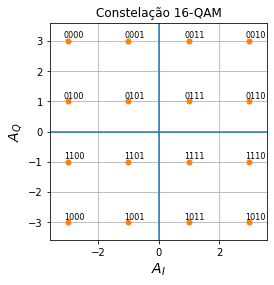

In [41]:
M = 16 # order of the modulation format
constType = 'qam' # 'qam', 'psk', 'pam' or 'ook'
plt.figure(figsize=(4,4))
plt.plot([],[])
plt.grid()
plt.ylabel('$A_Q$', fontsize=14)
plt.xlabel('$A_I$', fontsize=14)
plt.axis('square')

# plot modulation bit-to-symbol mapping
constSymb = GrayMapping(M, constType)             # Gray constellation mapping
bitMap = demodulateGray(constSymb, M, constType)  # bit mapping
bitMap = bitMap.reshape(-1, int(np.log2(M)))

# generate random bits
bits = bitMap.reshape(1, -1)

# Map bits to constellation symbols
symbTx = modulateGray(bits, M, constType)

# normalize symbols energy to 1
plt.xlim(1.2*min(symbTx.real),1.2*max(symbTx.real))
plt.ylim(1.2*min(symbTx.real),1.2*max(symbTx.real));
plt.vlines(0, 1.2*min(symbTx.real), 1.2*max(symbTx.real))
plt.hlines(0, 1.2*min(symbTx.real), 1.2*max(symbTx.real))

plt.plot(symbTx.real, symbTx.imag,'o', markersize=int(np.ceil(20/np.log2(M))),);
plt.title('Constelação '+str(M)+'-'+constType.upper());

for ind, symb in enumerate(constSymb):
    bitMap[ind,:]
    plt.annotate(str(bitMap[ind,:])[1:-1:2], xy = (symb.real-0.035*np.log2(M), symb.imag+0.1), size=int(np.ceil(30/np.log2(M))))

### Parâmetros importantes das modulações digitais

#### Energia média dos símbolos da constelação ($E_s$)

Considere $X$ uma variável aleatória discreta que representa a fonte de símbolos do transmissor. Em cada instante de sinalização, o transmissor envia para o canal um dos símbolos da constelação definida por $\mathcal{X} = \left\lbrace s_0, s_1, \dots, s_{M-1}\right\rbrace$, com probabilidade $P(s_n),\;n = 0,1,\dots,M-1$, de modo que $\sum_{n=0}^{M-1}P(s_n)=1$. A energia média $E_s$ dos símbolos enviados pelo transmissor será dada pelo valor esperado:

$$\begin{aligned} E_s &= E\left[X^2\right] \\ &= \sum_{n=0}^{M-1}|s_n|^2P(s_n) \end{aligned} $$

Se cada um dos $M$ símbolos ocorre com a mesma probabilidade, diz-se que a fonte gera símbolos equiprováveis, de modo que $P(s_n)=\frac{1}{M}$. Neste caso, temos

$$ \begin{aligned} E_s &=\sum_{n=0}^{M-1}|s_n|^2\frac{1}{M} \\ &=  \frac{1}{M}\sum_{n=0}^{M-1}|s_n|^2\end{aligned} $$

Exemplos: 

1. Considere a constelação 4-PAM definida por $\mathcal{X} = \left\lbrace -3, -1, 1, 3\right\rbrace$. Considerando que os símbolos são gerados de maneira equiprovável, temos que:

$$ \begin{aligned} E_s &=\sum_{n=0}^{M-1}|s_n|^2P(s_n) \\ &=  \frac{1}{4}\left[|-3|^2+|-1|^2+|1|^2+|3|^2\right] \\ &=  \frac{20}{4} = 5\end{aligned} $$

2. Considere a constelação 4-QAM definida por $\mathcal{X} = \left\lbrace -1-j, -1+j, 1+j, 1-j\right\rbrace$. Considerando que os símbolos são gerados de maneira equiprovável, temos que:

$$ \begin{aligned} E_s &=\sum_{n=0}^{M-1}|s_n|^2P(s_n) \\ &=  \frac{1}{4}\left[|-1-j|^2+|-1+j|^2+|1+j|^2+|1+j|^2\right] \\ &=  \frac{8}{4} = 2\end{aligned} $$

Logo, ao compararmos as modulações 4-PAM e 4-QAM dadas pelas constelações descritas, nota-se que ao utilizar a constelação 4-PAM o transmissor gastará, em média, $2,5\times$ mais energia por símbolo transmitido no canal do que gastaria utilizando a modulação 4-QAM. 

Em diversas situações deseja-se comparar o desempenho entre diferentes formatos de modulação num sistema de comunicações. Neste caso, comparar constelações que possuem valores distintos de energia média por símbolo pode causar inconsistências. Busca-se, então, normalizar a energia média por símbolo das constelações, ou seja, fazer com que $E_s = 1$, de modo a garantir uma comparação justa. Desse modo assume-se que, independentemente da modulação utilizada, o transmissor envia sempre a mesma energia média por símbolo transmitido ao canal. A normalização é feita dividindo-se os símbolos em $\mathcal{X}$ por $\sqrt{E_s}$. Para verificar essa afirmação, podemos assumir que um fator $\alpha\in \mathbb{R}$ é utilizado para ampliar ($\alpha>1$) ou reduzir ($0<\alpha<1$) as dimensões da constelação, de modo que $\mathcal{X} = \left\lbrace \alpha s_0,  \alpha s_1, \dots, \alpha s_{M-1}\right\rbrace$ é a constelação resultante. Seja $E_s^{(\alpha)}$ a nova energia média por símbolo da constelação, temos que

$$\begin{aligned} E_s^{(\alpha)} &= \sum_{n=0}^{M-1}|\alpha s_n|^2P(s_n) \\ &= \alpha^2\sum_{n=0}^{M-1}|s_n|^2P(s_n) \\ &= \alpha^2 E_s\end{aligned} $$

Logo, se $\alpha = \frac{1}{\sqrt{E_s}}$, então $E_s^{(\alpha)}=1$.

#### Distância euclidiana mínima entre símbolos ($d_{min}$)

Para uma dada constelação $\mathcal{X} = \left\lbrace s_0, s_1, \dots, s_{M-1}\right\rbrace$, a distância euclidiana mínima entre dois símbolos será dada por

$$d_{min} = \min_{i,k} |s_i-s_k| = \min_{i,k} \sqrt{(s_i-s_k)^2} $$.

com $i, k \in \left\lbrace 0, 1, \dots, M-1\right\rbrace$ e $i\neq k$.

Exemplos: 

1. Considere a constelação 4-PAM normalizada definida por $\mathcal{X} = \left\lbrace \frac{-3}{\sqrt{5}}, \frac{-1}{\sqrt{5}}, \frac{1}{\sqrt{5}}, \frac{3}{\sqrt{5}}\right\rbrace$, temos que $d_{min}=\frac{2}{\sqrt{5}}\approx 0.894$.

2. Considere a constelação 4-QAM normalizada definida por $\mathcal{X} = \left\lbrace \frac{-1-j}{\sqrt{2}}, \frac{-1+j}{\sqrt{2}}, \frac{1+j}{\sqrt{2}}, \frac{1-j}{\sqrt{2}}\right\rbrace$, temos que $d_{min}=\frac{2}{\sqrt{2}}\approx 1.414$.

## Intervalo de sinalização

Num sistema de comunicações digitais, o transmissor envia informação pelo canal de comunicações ao receptor. Diz-se que o transmissor "faz uso do canal" toda cada vez que envia um símbolo de um esquema de modulação representando uma sequência de bits. A taxa (ou frequência) em que o transmissor faz uso do canal para enviar símbolos é chamada de taxa (ou frequência) de sinalização, ou taxa de símbolos, sendo medida em [baud](https://en.wikipedia.org/wiki/Baud). Quanto maior a taxa de símbolos, maior será a banda de espectro necessária para a operação do sistema. Para recuperar corretamente a sequência de símbolos transmitida, faz-se necessário que o transmissor e receptor estejam **sincronizados**, ou seja, o receptor deve conhecer exatamente os intervalos de sinalização utilizados pelo transmissor para o envio da informação.

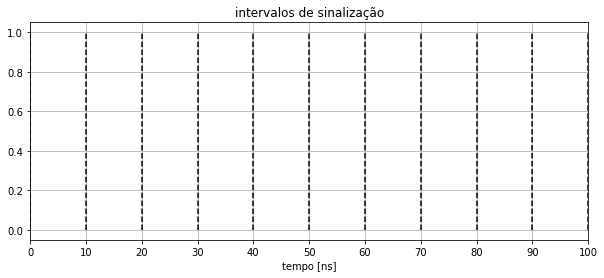

In [11]:
Rs  = 100e6  # Taxa de símbolos [baud]
Ts  = 1/Rs  # Período de símbolo em segundos
N   = 10    # número de intervalos de sinalização

t = np.arange(N+1)*(Ts/1e-9) # tempo em nanosegundos (ns)

plt.vlines(t, 0, 1, linestyles='dashed', color = 'k')    
plt.xlabel('tempo [ns]');
plt.title('intervalos de sinalização');
plt.grid()
plt.xticks(t);
plt.xlim(0, t.max());

## Teorema da amostragem

O teorema de amostragem de *Nyquist-Shannon* é um dos resultados mais importantes utilizados em processamento digital de sinais, servindo como uma ponte fundamental entre sinais de tempo contínuo e sinais de tempo discreto. O teorema estabelece uma **condição suficiente** para uma taxa de amostragem que permite que uma sequência discreta de amostras capture toda a informação de um sinal contínuo no tempo e de largura de banda finita.

Considerre $x(t)$ um sinal limitado em banda, i.e. o espectro de frequências de $X(f)=\mathcal{F}\{x(t)\}$ está contido no intervalo $-B\leq f \leq B$, ou seja 

$$ X(f) = \int_{-\infty}^{\infty} x(t)e^{j2\pi f t} dt = 0 \text{, se } f < -B \text{ ou } f > B$$

Suponha que obtenhamos um sinal discreto no tempo $x[k]$ a partir de um conjunto de amostras equiespaçadas de $x(t)$, ou seja $x[k]=x(kT_a)$, em que $T_a = \frac{1}{f_a}$ é o período de amostragem e $f_a$ a frequência de amostragem.

Se $f_a\geq 2B$, $x(t)$ pode ser perfeitamente reconstruído a partir de suas amostras $x[k]$ fazendo

$$
x(t)=\sum_{n=-\infty}^{\infty} x(k T_a) \operatorname{sinc}\left(\frac{t-kT_a}{T_a}\right).
$$


### Exemplo 1: função sinc(t)

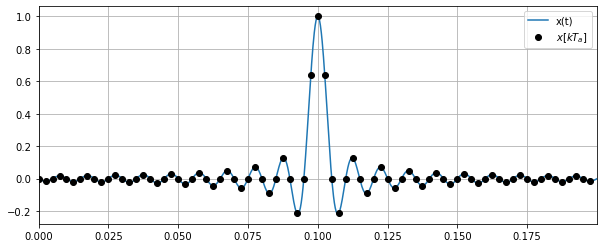

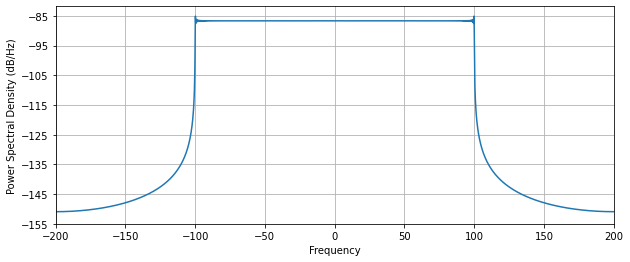

In [12]:
Fa = 400   # frequência de amostragem
B  = 100   # banda da sinc
Ta = 1/Fa  # período de amostragem

t = np.arange(0, 0.2, Ta/16) # duração do sinal [s]
d = t.size/2
x = np.sinc(2*B*(t-d*(Ta/16)))

# sinal amostrado com frequência de amostragem fa
xa = x[::16]
ta = t[::16]

plt.figure()
plt.plot(t, x,'-', label = 'x(t)')
plt.plot(ta, xa,'ko', label = '$x[kT_a]$')
plt.grid()
plt.legend()
plt.xlim(min(t), max(t))

# plota psd
x_psd = np.sinc(2*B*((np.arange(0, 2000)*Ta)-1000*Ta))
plt.figure();
plt.psd(x_psd, Fs=Fa, NFFT = 16*1024, sides='twosided')
plt.xlim(-Fa/2, Fa/2);

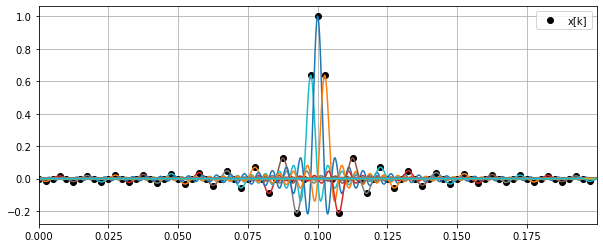

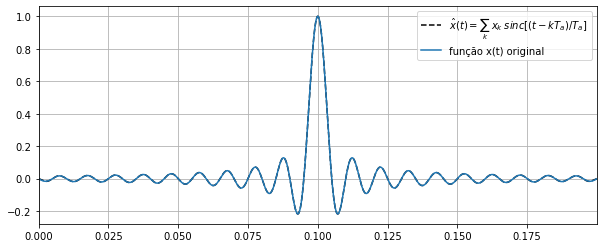

In [13]:
x_interp, t_interp = sincInterp(xa, Fa);

plt.figure()
plt.plot(t_interp, x_interp,'--k',label ='$\hat{x}(t) =\sum_{k}\;x_{k}\;sinc[(t-kT_a)/T_a]$');
plt.plot(t, x,'-',label = 'função x(t) original')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend();

### Exemplo 2: chirp de frequência linear

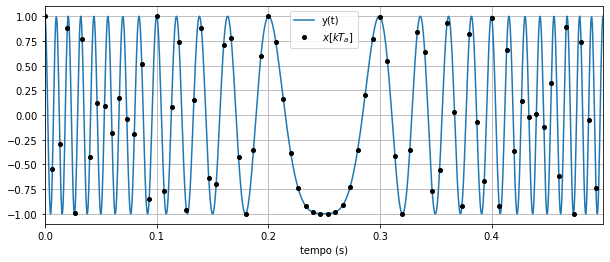

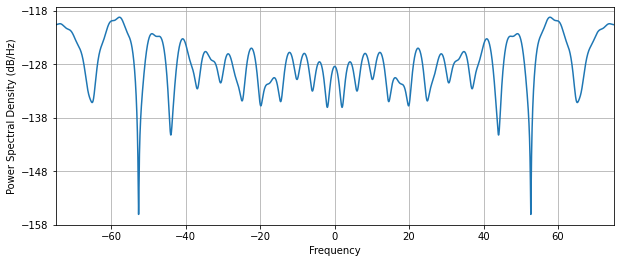

In [44]:
from scipy.signal import chirp

Fa = 150   # frequência de amostragem
Ta = 1/Fa  # período de amostragem
B  = 100

d = 1600
t = np.arange(0, 0.5, Ta/16) # duração do sinal [s]

x = chirp(t, f0=-100, f1=100, t1=max(t), method='linear')

# sinal amostrado com frequência de amostragem fa
xa = x[::16]
ta = t[::16]

plt.figure()
plt.plot(t, x,'-', label = 'y(t)')
plt.plot(ta, xa,'ko', markersize = 4, label = '$x[kT_a]$')
plt.xlabel('tempo (s)')
plt.grid()
plt.legend()
plt.xlim(min(t), max(t))

# plota psd
plt.figure();
plt.psd(xa, Fs=Fa, NFFT = 16*1024, sides='twosided')
plt.xlim(-Fa/2, Fa/2);

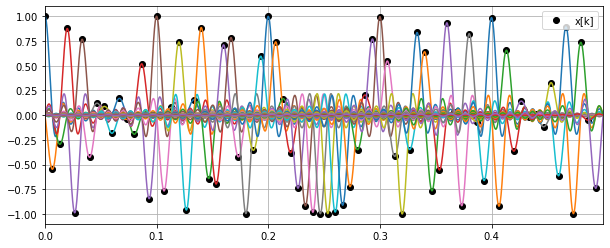

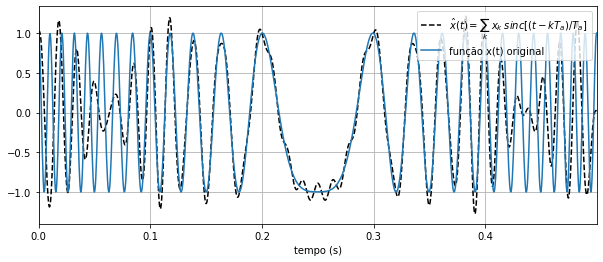

In [45]:
x_interp, t_interp = sincInterp(xa, Fa);

plt.figure()
plt.plot(t_interp, x_interp,'--k',label ='$\hat{x}(t) =\sum_{k}\;x_{k}\;sinc[(t-kT_a)/T_a]$');
plt.plot(t, x,'-',label = 'função x(t) original')
plt.xlabel('tempo (s)')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend(loc='upper right');

## Gerando sinais binários

$ E(t)=\operatorname{Re}\left[A(t) e^{j \theta} \exp \left(j \omega_c t\right)\right]$

$$ \begin{align} A(t) &= \left[ \sum_{n} s_{n} \delta \left(t-n T_{s}\right)\right] \ast p(t) \nonumber \\ & = \sum_{n} s_{n} p\left(t-n T_{s}\right)\end{align}$$

In [16]:
# parâmetros da simulação
Rs     = 100e6         # Taxa de símbolos
Ts     = 1/Rs          # Período de símbolo em segundos
SpS    = 128           # amostras por símbolo
Fa     = 1/(Ts/SpS)    # Frequência de amostragem do sinal (amostras/segundo)
Ta     = 1/Fa          # Período de amostragem

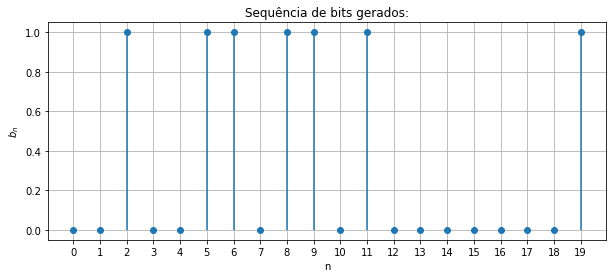

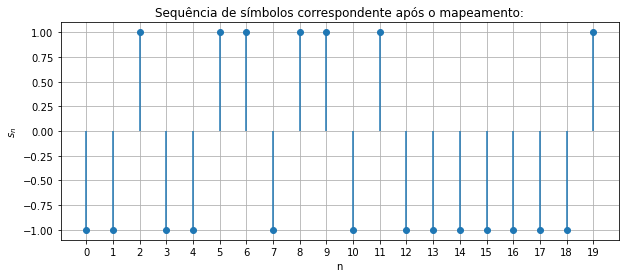

In [17]:
# gera sequência de bits pseudo-aleatórios
bits   = np.random.randint(2, size=20)    
n      = np.arange(bits.size)

# mapeia bits para símbolos binários
symbTx = 2*bits-1

plt.figure(1)
plt.title('Sequência de bits gerados:')
plt.stem(bits, basefmt=" ")
plt.xlabel('n')
plt.ylabel('$b_n$')
plt.grid()
plt.xticks(np.arange(0, bits.size));

plt.figure(2)
plt.title('Sequência de símbolos correspondente após o mapeamento:')
plt.stem(symbTx, basefmt=" ")
plt.xlabel('n')
plt.ylabel('$s_n$')
plt.grid()
plt.xticks(np.arange(0, symbTx.size));

### Pulso retangular ideal

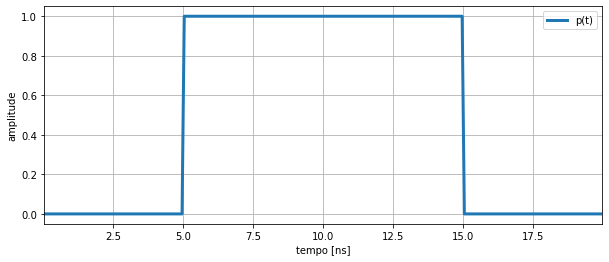

In [18]:
# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso retangular ideal
pulse = pulseShape('rect', SpS)
pulse = pulse/max(abs(pulse))

t = (0.5+np.arange(0, pulse.size))*(Ta/1e-9) # tempo em ps

plt.figure(1)
plt.plot(t, pulse,'-', label = 'p(t)', linewidth=3)
plt.xlabel('tempo [ns]')
plt.ylabel('amplitude')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend();

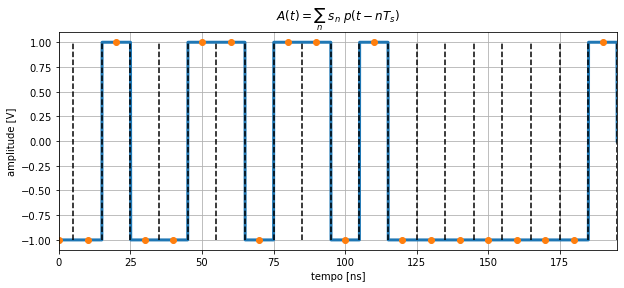

In [19]:
# formatação de pulso retangular
sigTx  = firFilter(pulse, symbolsUp)
sigTx  = sigTx.real

# plota sinal 
t = np.arange(sigTx.size)*(Ta/1e-9)

# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(2*bits-1, SpS)
symbolsUp[symbolsUp==0] = np.nan

plt.figure(2)
plt.plot(t, sigTx,'-', linewidth=3)
plt.plot(t, symbolsUp.real, 'o')
plt.xlabel('tempo [ns]')
plt.ylabel('amplitude [V]')
plt.title('$A(t)=\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5 + np.arange(bits.size))*(Ts/1e-9)
plt.vlines(t, -1, 1, linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

### Pulso NRZ típico

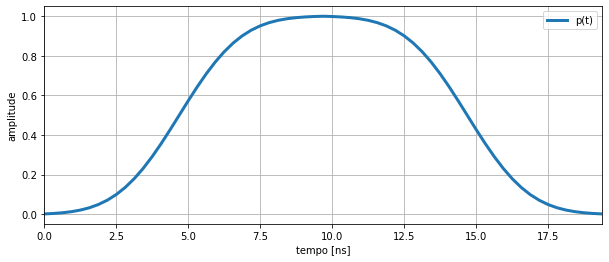

In [20]:
SpS   = 32            # amostras por símbolo
Fa    = 1/(Ts/SpS)    # Frequência de amostragem do sinal (amostras/segundo)
Ta    = 1/Fa          # Período de amostragem

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

t = np.arange(pulse.size)*(Ta/1e-9)

plt.figure(1)
plt.plot(t, pulse,'-', label = 'p(t)', linewidth=3)
plt.xlabel('tempo [ns]')
plt.ylabel('amplitude')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend();

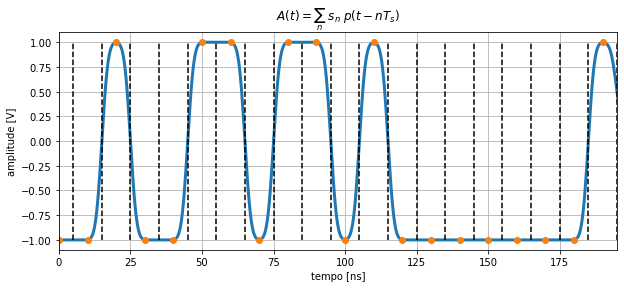

In [21]:
# upsampling
symbolsUp = upsample(symbTx, SpS)

# formatação de pulso retangular
sigTx  = firFilter(pulse, symbolsUp)
sigTx = sigTx.real

t = np.arange(sigTx.size)*(Ta/1e-9)

# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(2*bits-1, SpS)
symbolsUp[symbolsUp==0] = np.nan

plt.figure(2)
plt.plot(t, sigTx,'-',linewidth=3)
plt.plot(t, symbolsUp.real,'o')
plt.xlabel('tempo [ns]')
plt.ylabel('amplitude [V]')
plt.title('$A(t)=\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5*Ts + np.arange(0, bits.size*Ts, Ts))/1e-9
plt.vlines(t, -1, 1, linestyles='dashed', color = 'k');
plt.xlim(0, np.max(t));

### Pulso cosseno levantado

$$\large
p(t)=\left\{\begin{array}{ll}
\frac{\pi}{4 T} \operatorname{sinc}\left(\frac{1}{2 \beta}\right), & t=\pm \frac{T}{2 \beta} \\
\frac{1}{T} \operatorname{sinc}\left(\frac{t}{T}\right) \frac{\cos \left(\frac{\pi \beta t}{T}\right)}{1-\left(\frac{2 \beta t}{T}\right)^{2}}, & \text { caso contrário }
\end{array}\right.
$$

$$\large
P(f)=\left\{\begin{array}{ll}
1, & |f| \leq \frac{1-\beta}{2 T} \\
\frac{1}{2}\left[1+\cos \left(\frac{\pi T}{\beta}\left[|f|-\frac{1-\beta}{2 T}\right]\right)\right], & \frac{1-\beta}{2 T}<|f| \leq \frac{1+\beta}{2 T} \\
0, & \text { caso contrário }
\end{array}\right.
$$

In [22]:
t = sp.symbols('t', real=True)
T, β = sp.symbols('T, β', real=True, positive=True)

π = sp.pi

p = (1/T) * sp.sinc(t/T) * ( sp.cos(π*β*t/T) / (1 - (2*β*t/T)**2 ) )
#symdisp('p(t) =', p)

def plotRC(β):    
    t = np.arange(-25,25,0.1)
    π = np.pi
    T = 1

    p = (1/T) * np.sinc(t/T) * ( np.cos(π*β*t/T) / (1 - (2*β*t/T)**2 ) )
    
    P = np.fft.fftshift(np.fft.fft(p))
    plt.figure(1)
    plt.plot(20*np.log10(np.abs(P)))
    plt.grid()
    
    plt.figure(2)
    plt.plot(t,p)
    plt.grid()
    plt.ylim(-0.25, 1.25)
    plt.xlim(min(t), max(t))
    
interact(plotRC, β=(0.0001,1.0,0.005));

interactive(children=(FloatSlider(value=0.4951, description='β', max=1.0, min=0.0001, step=0.005), Output()), …

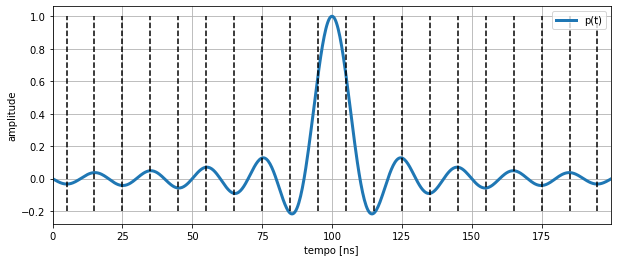

In [23]:
# pulso cosseno levantado (raised cosine)
Ncoeffs = 640
rolloff = 0.01

pulse = pulseShape('rc', SpS, Ncoeffs, rolloff, Ts)
pulse = pulse/max(abs(pulse))

t = np.arange(pulse.size)*(Ta/1e-9)

plt.figure(1)
plt.plot(t, pulse,'-', label = 'p(t)', linewidth=3)
plt.xlabel('tempo [ns]')
plt.ylabel('amplitude')
plt.xlim(min(t), max(t))
plt.grid()
plt.legend()

t = (0.0*Ts + np.arange(0, (Ncoeffs/SpS)*Ts, Ts))/1e-9
plt.vlines(t + 0.5*(Ts/1e-9), -0.2, 1, linestyles='dashed', color = 'k');

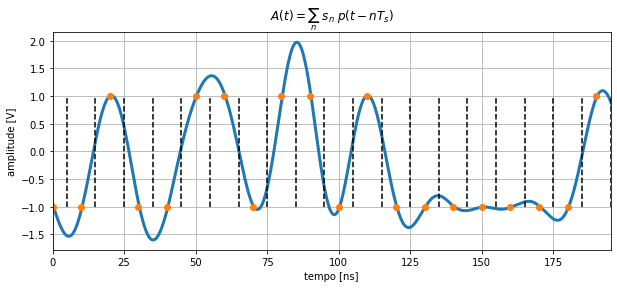

In [24]:
# upsampling
symbolsUp = upsample(symbTx, SpS)

# formatação de pulso 
sigTx = firFilter(pulse, symbolsUp)
sigTx = sigTx.real

t = np.arange(sigTx.size)*(Ta/1e-9)

# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(2*bits-1, SpS)
symbolsUp[symbolsUp==0] = np.nan

plt.figure(2)
plt.plot(t, sigTx,'-', linewidth=3)
plt.plot(t, symbolsUp.real,'o')
plt.xlabel('tempo [ns]')
plt.ylabel('amplitude [V]')
plt.title('$A(t)=\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5*Ts + np.arange(0, bits.size*Ts, Ts))/1e-9
plt.vlines(t, -1, 1, linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

## Densidade espectral de potência de sinais modulados digitalmenente

Considere $v(t)$ seja um sinal modulado em banda base no domínio do tempo associado a uma sequência de símbolos $\{s_n\}$ de um dado formato de modulação, ou seja

$$ \begin{equation}
v(t)=\sum_{n=-\infty}^{\infty} s_{n} p(t-n T).
\end{equation}
$$

em que $p(t)$ é o formato do pulso utilizado. O sinal $v(t)$ pode ser entendido como uma realização do processo estocástico $V(t)$ que, por sua vez, depende da sequência aleatória de símbolos $\{s_n\}$. Para cada realização distinta de $\{s_n\}$ temos uma forma de onda $v(t)$ associada.

### Valor médio e autocorrelação de $V(t)$


#### Valor médio

$$
\begin{equation}
\begin{aligned}
E[V(t)] &=\sum_{n=-\infty}^{\infty} E\left[s_{n}\right] p(t-n T) \\
&=m_{s} \sum_{n=-\infty}^{\infty} p(t-n T)
\end{aligned}
\end{equation}
$$

Perceba que $E[V(t)]$ é periódico em $t$ com período $T$, que corresponde ao intervalo de sinalização.

#### Autocorrelação

$$
\begin{equation}
R_{V}(t+\tau, t)=E\left[V^{*}(t) V(t+\tau)\right]=\sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} E\left[s_{n}^{*} s_{m}\right] p(t-nT) p(t+\tau-mT)
\end{equation}
$$

Considerando que $\{s_n\}$ seja uma sequência de símbolos de informação estacionária no sentido amplo, sua autocorrelação $R_{s}$ é definida como

$$
\begin{equation}
\begin{aligned}
R_{s}(n,n+m)&=E\left[s_{n}^{*}s_{n+m}\right]\nonumber\\
        &=R_{s}((n+m)-n)\nonumber\\
        &=R_{s}(m)
\end{aligned}
\end{equation}
$$

Logo,
$$
\begin{equation}
R_{V}(t+\tau, t) =\sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} R_{s}(m-n) p(t-nT) p(t+\tau-mT).
\end{equation}
$$

Podemos reescrever os somatórios de uma maneira mais conveniente fazendo a mudança de variáveis $m'= m-n$, de forma que

$$
\begin{equation}
\begin{aligned}
R_{V}(t+\tau, t) &=\sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} R_{s}(m-n) p(t-nT) p(t+\tau-mT)\nonumber\\
                 &=\sum_{n=-\infty}^{\infty} \sum_{m'=-\infty}^{\infty} R_{s}(m') p(t-nT) p(t+\tau-(m'+n)T)\nonumber\\
                 &=\sum_{m'=-\infty}^{\infty} R_{s}(m') \sum_{n=-\infty}^{\infty} p(t-nT) p(t+\tau -nT -m'T)
\end{aligned}
\end{equation}
$$

ou seja, apenas renomeando o índice do somatório, temos

$$
\begin{equation}
R_{V}(t+\tau, t) =\sum_{m=-\infty}^{\infty} R_{s}(m) \sum_{n=-\infty}^{\infty} p(t-nT) p(t+\tau -nT -mT)
\end{equation}
$$

Perceba que também a autocorrelação $R_{V}(t+\tau, t)$ é periódica em $t$ com período $T$, o que caracteriza $V(t)$ como um *processo cicloestacionário*. Desse modo, podemos caracterizar $V(t)$ pela sua função de autocorrelação média $\bar{R}_{V}(t+\tau, t)$ definida por

$$
\begin{equation}
\begin{aligned}
\bar{R}_{V}(\tau) &=\frac{1}{T} \int_{-T / 2}^{T / 2} R_{V}(t+\tau, t) d t \\
&=\sum_{m=-\infty}^{\infty} R_{s}(m) \sum_{n=-\infty}^{\infty} \frac{1}{T} \int_{-T / 2}^{T / 2} p(t-n T) p(t+\tau-n T-m T) d t \\
&=\sum_{m=-\infty}^{\infty} R_{s}(m) \sum_{n=-\infty}^{\infty} \frac{1}{T} \int_{n T-T / 2}^{n T+T / 2} p(t) p(t+\tau-m T) d t \\
&=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) \int_{-\infty}^{\infty} p(t) p(t+\tau-m T) d t.
\end{aligned}
\end{equation}
$$

A integral $\int_{-\infty}^{\infty} p(t) p(t+\tau-m T) dt$ é interpretada como a autocorrelação temporal $R_{p}(\tau)$ do pulso $p(t)$, ou seja

$$
\begin{equation}
R_{p}(\tau)=\int_{-\infty}^{\infty} p(t) p(t+\tau) dt.
\end{equation}
$$

Assim, temos

$$
\begin{equation}
\bar{R}_{V}(\tau)=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) R_{p}(\tau-m T).
\end{equation}
$$

### Densidade espectral de potência $\mathcal{S}_{V}(f)$

Uma vez estabelecida $\bar{R}_{V}(\tau)$, podemos utilizar o teorema de Wiener-Khinchin [2] para determinar a densidade espectral de potência $\mathcal{S}_{V}(f)$ associada a $V(t)$. O teorema estabelece que $\mathcal{S}_{V}(f)$ e $\bar{R}_{V}(\tau)$ são relacionadas por meio da transformada de Fourier, ou seja

$$
\begin{equation}
\begin{aligned}
\mathcal{S}_{V}(f) &=\int_{-\infty}^{\infty} \bar{R}_{V}(\tau) e^{-j 2 \pi f \tau} d \tau \\
&=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) \int_{-\infty}^{\infty} R_{p}(\tau-m T) e^{-j 2 \pi f \tau} d \tau \\
&=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) e^{j 2 \pi f m T}\int_{-\infty}^{\infty} R_{p}(\tau) e^{-j 2 \pi f \tau} d \tau \\
&=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) e^{-j 2 \pi f m T}\int_{-\infty}^{\infty} \left[\int_{-\infty}^{\infty} p(t) p(t+\tau) d t\right] e^{-j 2 \pi f \tau} d \tau \\
&=\frac{1}{T} \sum_{m=-\infty}^{\infty} R_{s}(m) e^{-j 2 \pi f m T}\int_{-\infty}^{\infty}p(t) e^{j 2 \pi f t}dt\int_{-\infty}^{\infty}p(\tau)e^{-j 2 \pi f \tau} d \tau \\
&=\frac{1}{T} \mathcal{S}_{s}(f)P^*(f)P(f) \\
&=\frac{1}{T} \mathcal{S}_{s}(f)\left|P(f)\right|^{2}.
\end{aligned}
\end{equation}
$$

Portanto,

$$
\begin{equation}
\mathcal{S}_{V}(f) = \frac{1}{T} \mathcal{S}_{s}(f)\left|P(f)\right|^{2},
\end{equation}
$$

em que $\mathcal{S}_{s}(f)$ é dada por
$$
\begin{equation}
\mathcal{S}_{s}(f)=\sum_{m=-\infty}^{\infty} R_{s}(m) e^{-j 2 \pi f m T}.
\end{equation}
$$

Em resumo, a densidade espectral de potência de $\mathcal{S}_{V}(f)$ depende de dois parâmetros: 

1. Do espectro de potência associado à transformada de Fourier $P(f)$ do pulso $p(t)$.
2. Das caraterísticas espectrais $\mathcal{S}_{s}(f)$ da sequência de símbolos de informação $\{s_n\}$.

No caso particular, que engloba a maioria das situações práticas, os símbolos em $\{s_n\}$ são mutuamente descorrelacionados, de forma que

$$
\begin{equation}
R_{s}(m) = \begin{cases}\sigma_{s}^{2}+m_{s}^{2}, & m=0 \\ m_{s}^{2}, & m \neq 0\end{cases}
\end{equation}
$$

em que $\sigma_{s}^{2}+m_{s}^{2}=E[s^2]$ é a energia média dos símbolos da constelação.

ou seja,

$$
\begin{equation}
\mathcal{S}_{s}(f)=\sigma_{s}^{2}+m_{s}^{2} \sum_{m=-\infty}^{\infty} e^{-j 2 \pi f m T}
\end{equation}
$$

Utilizando a relação entre um trem trem de impulsos no domínio da frequência e sua representação em termos da série de Fourier, temos que

$$
\begin{equation}
\sum_{n=-\infty}^{\infty} e^{-j 2 \pi f mT}=\frac{1}{T} \sum_{m=-\infty}^{\infty} \delta\left(f-\frac{m}{T}\right).
\end{equation}
$$

Assim, podemos reescrever

$$
\begin{equation}
\mathcal{S}_{s}(f)=\sigma_{s}^{2}+\frac{m_{s}^{2}}{T} \sum_{m=-\infty}^{\infty} \delta\left(f-\frac{m}{T}\right).
\end{equation}
$$

Finalmente, $\mathcal{S}_{V}(f)$ será dada por

$$
\begin{equation}
\mathcal{S}_{V}(f)=\frac{\sigma_{s}^{2}}{T}\left|P(f)\right|^{2}+\frac{m_{s}^{2}}{T^{2}} \sum_{m=-\infty}^{\infty}\left|P\left(\frac{m}{T}\right)\right|^{2} \delta\left(f-\frac{m}{T}\right).
\end{equation}
$$

De maneira geral, as constelações dos formatos de modulação ASK, PSK, QAM são definidas de tal forma que $m_{s}=0$, bastando apenas que os símbolos sejam posicionados de forma simétrica no plano complexo. Nesse caso, temos

$$
\begin{equation}
\mathcal{S}_{V}(f)=\frac{\sigma_{s}^{2}}{T}\left|P(f)\right|^{2}
\end{equation}
$$

ou seja, o formato de $\mathcal{S}_{V}(f)$ depende apenas do tipo de pulso $p(t)$ escolhido.

Para mais detalhes, ver capítulo 8 de [2].

### Exemplos de densidade espectral de potência de sinais modulados

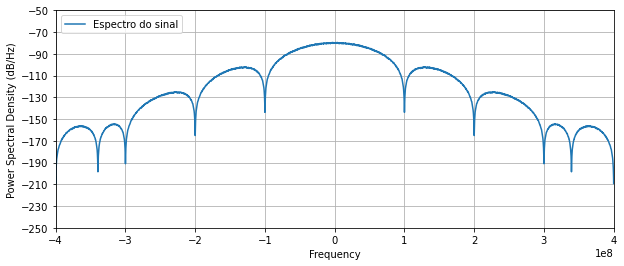

In [25]:
# gera sequência de bits pseudo-aleatórios
bits   = np.random.randint(2, size=200000)    
n      = np.arange(0, bits.size)
pulseType = 'nrz'

# mapeia bits para pulsos elétricos
symbTx = 2*bits-1
symbTx = symbTx/np.sqrt(signal_power(symbTx))

# upsampling
symbolsUp = upsample(symbTx, SpS)

if pulseType == 'rc':
    # pulso cosseno levantado (raised cosine)
    Ncoeffs = 640
    rolloff = 0.1

    pulse = pulseShape('rc', SpS, Ncoeffs, rolloff, Ts)
    pulse = pulse/max(abs(pulse))
    
elif pulseType == 'nrz':
    # pulso NRZ típico
    pulse = pulseShape('nrz', SpS)
    pulse = pulse/max(abs(pulse))

# formatação de pulso
sigTx = firFilter(pulse, symbolsUp)

# plota psd
plt.figure();
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);
plt.psd(sigTx,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal')
plt.legend(loc='upper left');

## Modulação M-PAM

### Diagramas de constelação

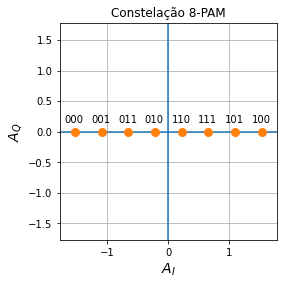

In [26]:
M = 8 # order of the modulation format
constType = 'pam' # 'qam', 'psk', 'pam' or 'ook'

plt.figure(figsize=(4,4))
plt.plot([],[])

plt.grid()
plt.ylabel('$A_Q$', fontsize=14)
plt.xlabel('$A_I$', fontsize=14)
plt.axis('square')

# plot modulation bit-to-symbol mapping
constSymb = GrayMapping(M, constType)             # Gray constellation mapping
bitMap = demodulateGray(constSymb, M, constType)  # bit mapping
bitMap = bitMap.reshape(-1, int(np.log2(M)))

# generate random bits
bits = bitMap.reshape(1, -1)

# Map bits to constellation symbols
symbTx = modulateGray(bits, M, constType)

# normalize symbols energy to 1
symbTx = pnorm(symbTx)
plt.vlines(0,min(symbTx.real)-0.25,max(symbTx.real)+0.25)
plt.hlines(0,min(symbTx.real)-0.25,max(symbTx.real)+0.25)
plt.plot(symbTx.real, symbTx.imag,'o', markersize=8,);
plt.title('Constelação '+str(M)+'-'+constType.upper());
plt.xlim(min(symbTx.real)-0.25,max(symbTx.real)+0.25)
plt.ylim(min(symbTx.real)-0.25,max(symbTx.real)+0.25);

for ind, symb in enumerate(pnorm(constSymb)):
    bitMap[ind,:]
    plt.annotate(str(bitMap[ind,:])[1:-1:2], xy = (symb.real-0.055*np.log2(M), symb.imag+0.15), size=10)

### Mapeando bits para símbolos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
bits 0,0,1,0,0,0,1,1,1,0,1,0,1,1,1,1,0,1,1,0,1,0,1,1,0,0
bits 1,1,0,0,0,0,1,0,1,0,1,1,1,1,0,0,1,1,0,1,0,0,0,0,1,1
bits 2,0,0,1,1,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1


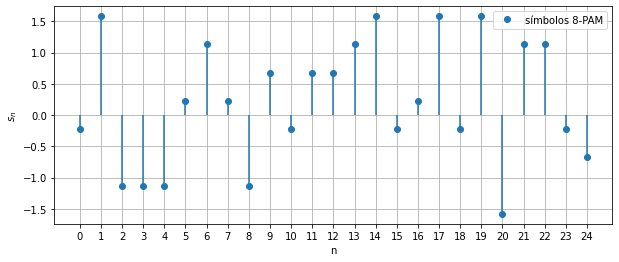

In [27]:
# parâmetros da simulação
SpS = 16            # Amostras por símbolo
Rs  = 100e6         # Taxa de símbolos
Ts  = 1/Rs          # Período de símbolo em segundos
Fa  = 1/(Ts/SpS)    # Frequência de amostragem do sinal (amostras/segundo)
Ta  = 1/Fa          # Período de amostragem

# generate pseudo-random bit sequence
bitsTx = np.random.randint(2, size = int(25*np.log2(M)))

# generate ook modulated symbol sequence
symbTx = modulateGray(bitsTx, M, 'pam')    
symbTx = pnorm(symbTx) # power normalization

plt.stem(symbTx, basefmt=" ", label ='símbolos '+str(M)+'-PAM')
plt.xlabel('n')
plt.ylabel('$s_n$')
plt.grid()
plt.legend(loc='upper right')
plt.xticks(np.arange(0, symbTx.size));

df = pd.DataFrame()
for b in range(int(np.log2(M))):
    df['bits '+str(b)] = bitsTx[b::int(np.log2(M))]

display(df.T)

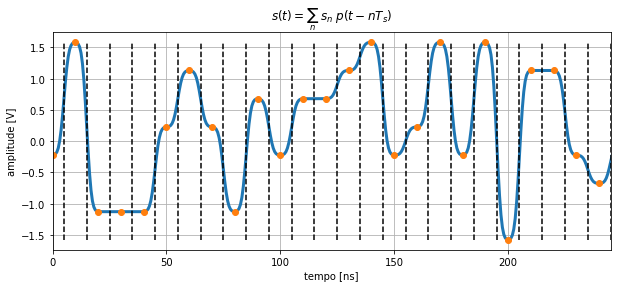

In [28]:
# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# formatação de pulso
sigTx = firFilter(pulse, symbolsUp)
sigTx = sigTx.real

t = np.arange(0, sigTx.size)*(1/Fa)/1e-9

# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(symbTx, SpS)
symbolsUp[symbolsUp==0] = np.nan

plt.figure(2)
plt.plot(t, sigTx,'-',linewidth=3)
plt.plot(t, symbolsUp.real,'o')
plt.xlabel('tempo [ns]')
plt.ylabel('amplitude [V]')
plt.title('$s(t)=\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5*Ts + np.arange(0, symbTx.size*Ts, Ts))/1e-9
plt.vlines(t, min(symbTx), max(symbTx), linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

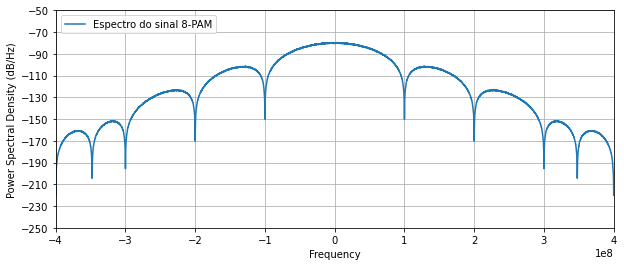

In [29]:
# generate pseudo-random bit sequence
bitsTx = np.random.randint(2, size=int(np.log2(M)*500000))

# generate modulated symbol sequence
symbTx = modulateGray(bitsTx, M, 'pam')    
symbTx = pnorm(symbTx) # power normalization

# upsampling
symbolsUp = upsample(symbTx, SpS)

# NRZ pulse shaping
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

sigTx  = firFilter(pulse, symbolsUp)
sigTx = sigTx.real

# plot PSD
plt.figure();
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);
plt.psd(sigTx,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal '+ str(M) +'-PAM')
plt.legend(loc='upper left');

### Diagramas de olho

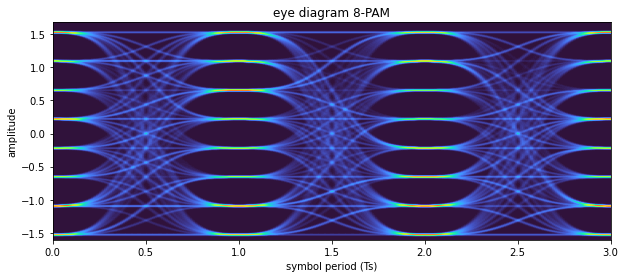

In [30]:
# diagrama de olho
Nsamples = sigTx.size
eyediagram(sigTx, Nsamples, SpS, plotlabel= str(M)+'-PAM', ptype='fancy')

## Modulação M-QAM

### Diagramas de constelação

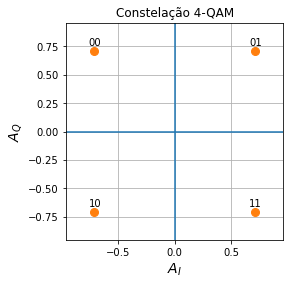

In [31]:
M = 4 # order of the modulation format
constType = 'qam' # 'qam', 'psk', 'pam' or 'ook'

plt.figure(figsize=(4,4))
plt.plot([],[])

plt.grid()
plt.ylabel('$A_Q$', fontsize=14)
plt.xlabel('$A_I$', fontsize=14)
plt.axis('square')

# plot modulation bit-to-symbol mapping
constSymb = GrayMapping(M, constType)             # Gray constellation mapping
bitMap = demodulateGray(constSymb, M, constType)  # bit mapping
bitMap = bitMap.reshape(-1, int(np.log2(M)))

# generate random bits
bits = bitMap.reshape(1, -1)

# Map bits to constellation symbols
symbTx = modulateGray(bits, M, constType)

# normalize symbols energy to 1
symbTx = pnorm(symbTx)
plt.vlines(0,min(symbTx.real)-0.25,max(symbTx.real)+0.25)
plt.hlines(0,min(symbTx.real)-0.25,max(symbTx.real)+0.25)
plt.plot(symbTx.real, symbTx.imag,'o', markersize=8,);
plt.title('Constelação '+str(M)+'-'+constType.upper());
plt.xlim(min(symbTx.real)-0.25,max(symbTx.real)+0.25)
plt.ylim(min(symbTx.real)-0.25,max(symbTx.real)+0.25);

for ind, symb in enumerate(pnorm(constSymb)):
    bitMap[ind,:]
    plt.annotate(str(bitMap[ind,:])[1:-1:2], xy = (symb.real-0.025*np.log2(M), symb.imag+0.05), size=10)

### Mapeando bits para símbolos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
bits 0,0,1,0,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1
bits 1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0


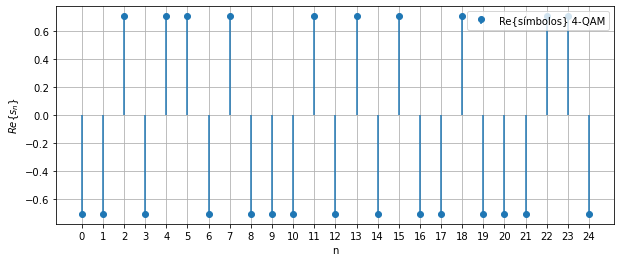

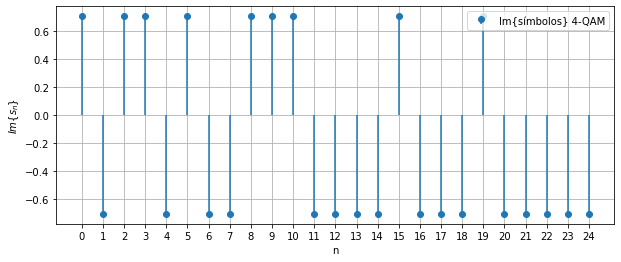

In [32]:
# parâmetros da simulação
SpS = 16            # Amostras por símbolo
Rs  = 100e6         # Taxa de símbolos
Ts  = 1/Rs          # Período de símbolo em segundos
Fa  = 1/(Ts/SpS)    # Frequência de amostragem do sinal (amostras/segundo)
Ta  = 1/Fa          # Período de amostragem

# generate pseudo-random bit sequence
bitsTx = np.random.randint(2, size = int(25*np.log2(M)))

# generate ook modulated symbol sequence
symbTx = modulateGray(bitsTx, M, 'qam')    
symbTx = pnorm(symbTx) # power normalization

plt.stem(symbTx.real, basefmt=" ", label ='Re{símbolos} '+str(M)+'-QAM')
plt.xlabel('n')
plt.ylabel('$Re\{s_n\}$')
plt.grid()
plt.legend(loc='upper right')
plt.xticks(np.arange(0, symbTx.size));

plt.figure()
plt.stem(symbTx.imag, basefmt=" ", label ='Im{símbolos} '+str(M)+'-QAM')
plt.xlabel('n')
plt.ylabel('$Im\{s_n\}$')
plt.grid()
plt.legend(loc='upper right')
plt.xticks(np.arange(0, symbTx.size));

df = pd.DataFrame()
for b in range(int(np.log2(M))):
    df['bits '+str(b)] = bitsTx[b::int(np.log2(M))]

display(df.T)

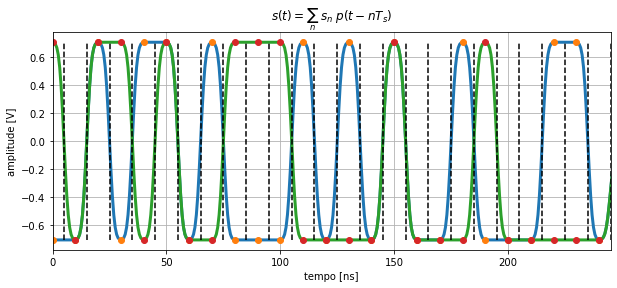

In [33]:
# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# formatação de pulso
sigTx = firFilter(pulse, symbolsUp)

t = np.arange(sigTx.size)*Ta/1e-9

# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(symbTx, SpS)
symbolsUp[symbolsUp==0+1j*0] = np.nan + 1j*np.nan

plt.figure(2)
plt.plot(t, sigTx.real,'-',linewidth=3, label = '$Re\{s_n\}$')
plt.plot(t, symbolsUp.real,'o')
plt.plot(t, sigTx.imag,'-',linewidth=3, label = '$Im\{s_n\}$')
plt.plot(t, symbolsUp.imag,'o')
plt.xlabel('tempo [ns]')
plt.ylabel('amplitude [V]')
plt.title('$s(t)=\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5*Ts + np.arange(0,symbTx.size*Ts, Ts))/1e-9
plt.vlines(t, min(symbTx.real), max(symbTx.real), linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

### Espectro do sinal modulado

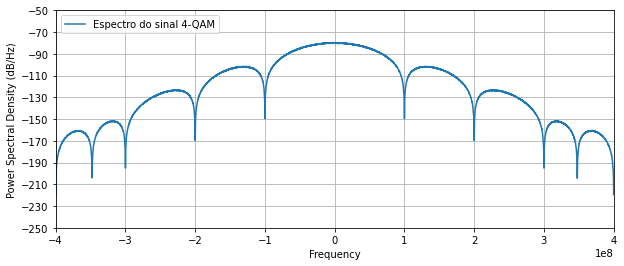

In [34]:
# generate pseudo-random bit sequence
bitsTx = np.random.randint(2, size=int(np.log2(M)*500000))

# generate modulated symbol sequence
symbTx = modulateGray(bitsTx, M, 'qam')    
symbTx = pnorm(symbTx) # power normalization

# upsampling
symbolsUp = upsample(symbTx, SpS)

# NRZ pulse shaping
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

sigTx  = firFilter(pulse, symbolsUp)

# plot PSD
plt.figure();
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);
plt.psd(sigTx,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal '+ str(M) +'-QAM')
plt.legend(loc='upper left');

### Diagramas de olho

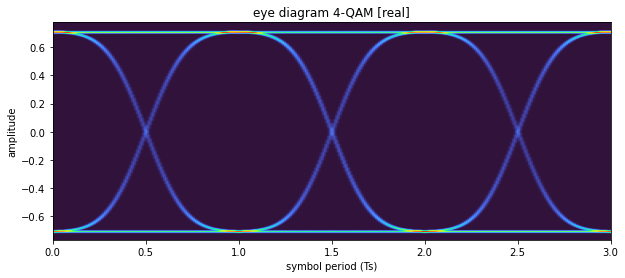

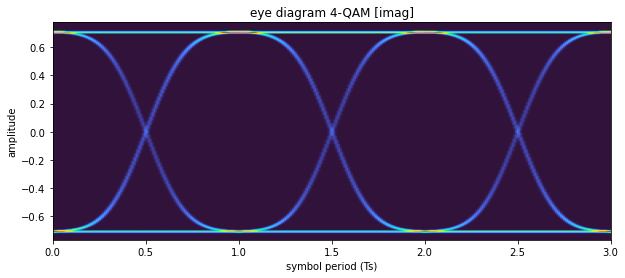

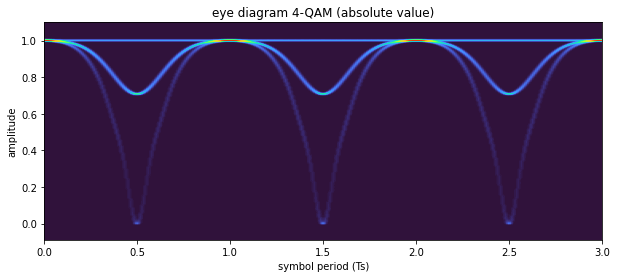

In [35]:
# diagrama de olho
Nsamples = sigTx.size
eyediagram(sigTx, Nsamples, SpS, plotlabel= str(M)+'-QAM', ptype='fancy')

eyediagram(np.abs(sigTx), Nsamples, SpS, plotlabel= str(M)+'-QAM (absolute value)', ptype='fancy')

## Modulação M-PSK

### Diagramas de constelação

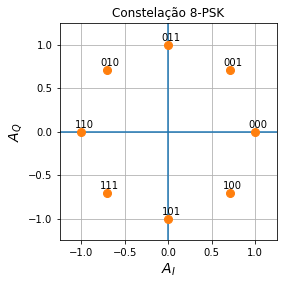

In [36]:
M = 8 # order of the modulation format
constType = 'psk' # 'qam', 'psk', 'pam' or 'ook'

plt.figure(figsize=(4,4))
plt.plot([],[])

plt.grid()
plt.ylabel('$A_Q$', fontsize=14)
plt.xlabel('$A_I$', fontsize=14)
plt.axis('square')

# plot modulation bit-to-symbol mapping
constSymb = GrayMapping(M, constType)             # Gray constellation mapping
bitMap = demodulateGray(constSymb, M, constType)  # bit mapping
bitMap = bitMap.reshape(-1, int(np.log2(M)))

# generate random bits
bits = bitMap.reshape(1, -1)

# Map bits to constellation symbols
symbTx = modulateGray(bits, M, constType)

# normalize symbols energy to 1
symbTx = pnorm(symbTx)
plt.vlines(0,min(symbTx.real)-0.25,max(symbTx.real)+0.25)
plt.hlines(0,min(symbTx.real)-0.25,max(symbTx.real)+0.25)
plt.plot(symbTx.real, symbTx.imag,'o', markersize=8,);
plt.title('Constelação '+str(M)+'-'+constType.upper());
plt.xlim(min(symbTx.real)-0.25,max(symbTx.real)+0.25)
plt.ylim(min(symbTx.real)-0.25,max(symbTx.real)+0.25);


for ind, symb in enumerate(pnorm(constSymb)):
    bitMap[ind,:]
    plt.annotate(str(bitMap[ind,:])[1:-1:2], xy = (symb.real-0.025*np.log2(M), symb.imag+0.05), size=10)

### Mapeando bits para símbolos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
bits 0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,1,0,1,1,0
bits 1,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1
bits 2,1,0,1,0,1,1,1,1,0,0,0,1,0,0,1,1,1,1,0,0,1,1,1,0,0


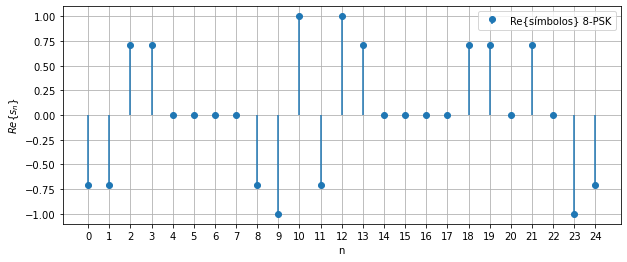

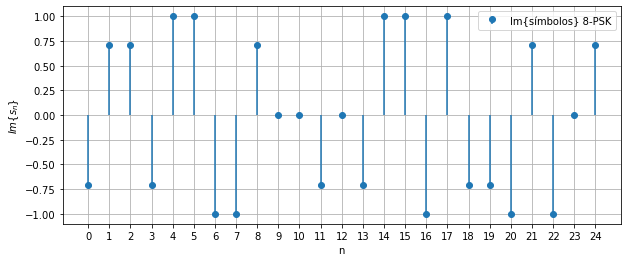

In [37]:
# parâmetros da simulação
SpS = 16            # Amostras por símbolo
Rs  = 100e6         # Taxa de símbolos
Ts  = 1/Rs          # Período de símbolo em segundos
Fa  = 1/(Ts/SpS)    # Frequência de amostragem do sinal (amostras/segundo)
Ta  = 1/Fa          # Período de amostragem

# generate pseudo-random bit sequence
bitsTx = np.random.randint(2, size = int(25*np.log2(M)))

# generate ook modulated symbol sequence
symbTx = modulateGray(bitsTx, M, 'psk')    
symbTx = pnorm(symbTx) # power normalization

plt.stem(symbTx.real, basefmt=" ", label ='Re{símbolos} '+str(M)+'-PSK')
plt.xlabel('n')
plt.ylabel('$Re\{s_n\}$')
plt.grid()
plt.legend(loc='upper right')
plt.xticks(np.arange(0, symbTx.size));

plt.figure()
plt.stem(symbTx.imag, basefmt=" ", label ='Im{símbolos} '+str(M)+'-PSK')
plt.xlabel('n')
plt.ylabel('$Im\{s_n\}$')
plt.grid()
plt.legend(loc='upper right')
plt.xticks(np.arange(0, symbTx.size));

df = pd.DataFrame()
for b in range(int(np.log2(M))):
    df['bits '+str(b)] = bitsTx[b::int(np.log2(M))]

display(df.T)

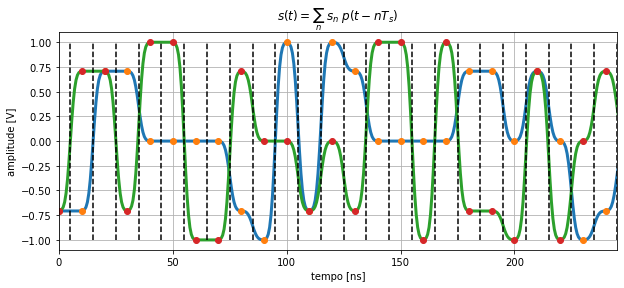

In [38]:
# upsampling
symbolsUp = upsample(symbTx, SpS)

# pulso NRZ típico
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

# formatação de pulso
sigTx = firFilter(pulse, symbolsUp)

t = np.arange(sigTx.size)*Ta/1e-9

# instantes centrais dos intervalos de sinalização
symbolsUp = upsample(symbTx, SpS)
symbolsUp[symbolsUp==0+1j*0] = np.nan + 1j*np.nan

plt.figure(2)
plt.plot(t, sigTx.real,'-',linewidth=3, label = '$Re\{s_n\}$')
plt.plot(t, symbolsUp.real,'o')
plt.plot(t, sigTx.imag,'-',linewidth=3, label = '$Im\{s_n\}$')
plt.plot(t, symbolsUp.imag,'o')
plt.xlabel('tempo [ns]')
plt.ylabel('amplitude [V]')
plt.title('$s(t)=\sum_{n}\;s_{n}\;p(t-n T_s)$')
plt.grid()

t = (0.5*Ts + np.arange(0,symbTx.size*Ts, Ts))/1e-9
plt.vlines(t, min(symbTx.real), max(symbTx.real), linestyles='dashed', color = 'k');
plt.xlim(0, max(t));

### Espectro do sinal modulado

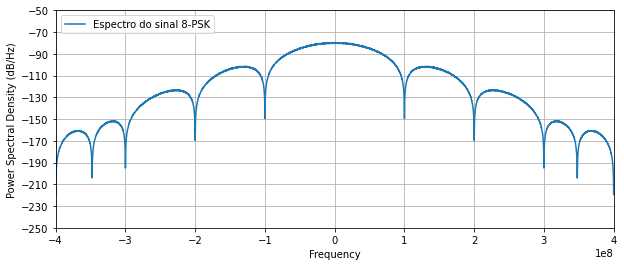

In [39]:
# generate pseudo-random bit sequence
bitsTx = np.random.randint(2, size=int(np.log2(M)*500000))

# generate modulated symbol sequence
symbTx = modulateGray(bitsTx, M, 'psk')    
symbTx = pnorm(symbTx) # power normalization

# upsampling
symbolsUp = upsample(symbTx, SpS)

# NRZ pulse shaping
pulse = pulseShape('nrz', SpS)
pulse = pulse/max(abs(pulse))

sigTx  = firFilter(pulse, symbolsUp)

# plot PSD
plt.figure();
plt.xlim(-4*Rs,4*Rs);
plt.ylim(-250,-50);
plt.psd(sigTx,Fs=Fa, NFFT = 16*1024, sides='twosided', label = 'Espectro do sinal '+ str(M) +'-PSK')
plt.legend(loc='upper left');

### Diagramas de olho

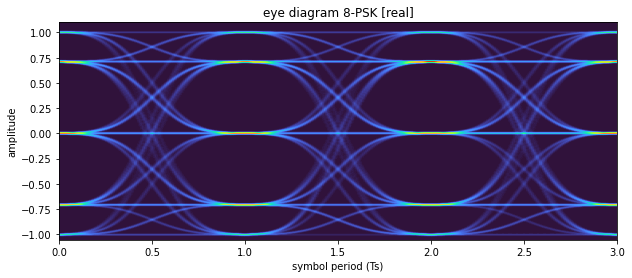

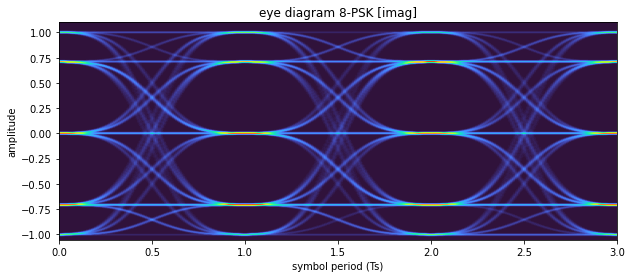

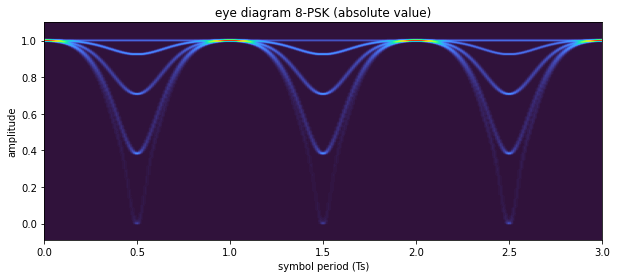

In [40]:
# diagrama de olho
Nsamples = sigTx.size
eyediagram(sigTx, Nsamples, SpS, plotlabel= str(M)+'-PSK', ptype='fancy')

eyediagram(np.abs(sigTx), Nsamples, SpS, plotlabel= str(M)+'-PSK (absolute value)', ptype='fancy')

## Referências

[1] J. G. Proakis, M. Salehi, Communication Systems Engineering, 2nd Edition, Pearson, 2002.